Non-Fatal    66
Fatal        11
Name: shooting_type_v2, dtype: int64


<AxesSubplot:>

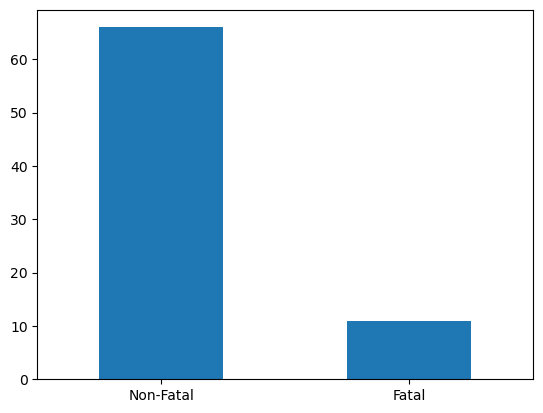

In [2]:
import pandas as pd

# shape=pd.read_csv('../../data/shapefile.csv')
shootings=pd.read_csv('../../data/shootings.csv')

# print(shape.head(3))
# print(shootings.head(3))
#
# d4=shape.loc[shape['LONGNAME']=='District 4',:]
# print(d4)

d4shooting=shootings.loc[shootings['district']=='D4',:]

# print(d4shooting)

type_stats=d4shooting['shooting_type_v2'].value_counts()
print(type_stats)
type_stats.plot(kind='bar',rot=0)

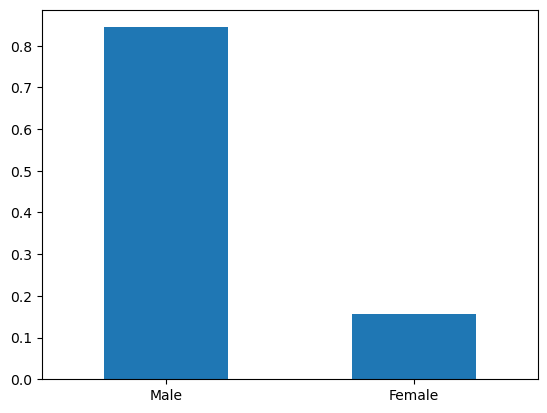

In [3]:
gender=(d4shooting['victim_gender'].value_counts()/d4shooting.shape[0]).plot(kind='bar',rot=0)


The ratio of male victim is much higher than the ratio of female victim.

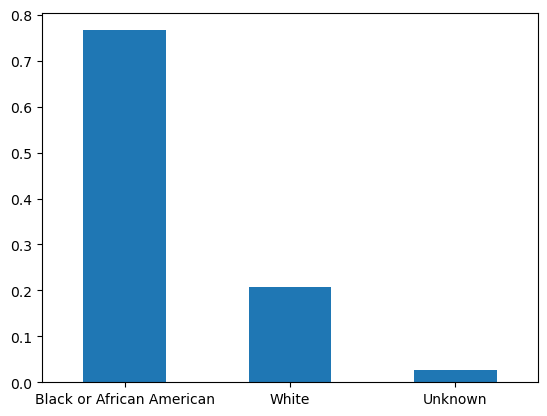

In [4]:
gender=(d4shooting['victim_race'].value_counts()/d4shooting.shape[0]).plot(kind='bar',rot=0)


The ratio of black or african american victim is much higher than the ratio of white victim.

In [5]:
violence=pd.read_csv('../../data/violence.csv')
# print(violence.head(1))
violence=violence.loc[violence['DISTRICT']=='D4',:]
print(violence['SHOOTING'].value_counts())


0    1339
1       6
Name: SHOOTING, dtype: int64


The observation shows that out of the total number of violence incidents, only 6 involved the use of guns, while 1339 incidents did not involve any gunshots.

In [8]:
from folium.plugins import HeatMap
from folium import Map
map_data=violence.groupby('Location',as_index=False).size()
location=map_data.Location.str.replace("(","").str.replace(")","").str.split(",",expand=True)
map_data[['latitude','longitude']]=location
print(map_data)
map_data.drop('Location',axis=1,inplace=True)
size = map_data.pop('size')
map_data.insert(2,'size',size)

print(map_data)
base_map = Map(location=[42.33182960914501, -71.0734727352688], zoom_start=12)
HeatMap(map_data).add_to(base_map)
base_map

                                     Location  size            latitude  \
0      (42.33182960914501, -71.0734727352688)     4   42.33182960914501   
1    (42.332010968114055, -71.07564695026329)     1  42.332010968114055   
2     (42.33246399295361, -71.07874760292749)     1   42.33246399295361   
3     (42.33283999950087, -71.07444001609862)     1   42.33283999950087   
4    (42.332850000316306, -71.08105995009493)     2  42.332850000316306   
..                                        ...   ...                 ...   
436   (42.35393998160168, -71.07802991620524)     1   42.35393998160168   
437   (42.35433642633503, -71.07323766559495)     1   42.35433642633503   
438    (42.3545193081305, -71.07588081713469)     6    42.3545193081305   
439   (42.35481002342846, -71.07482994772025)     2   42.35481002342846   
440  (42.355052443322855, -71.07390741979758)     1  42.355052443322855   

               longitude  
0      -71.0734727352688  
1     -71.07564695026329  
2     -71.07874760

C:\Users\17569\AppData\Local\Temp\ipykernel_17032\2261630168.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  location=map_data.Location.str.replace("(","").str.replace(")","").str.split(",",expand=True)


From the heatmap, I observed that the east part of the district 4 has more violence.